In [1]:
from fastai.vision.all import *

In [5]:
path = Path('/media/karhd/DATA/petsData/images')

In [8]:
torch.cuda.set_device(0)

In [6]:
path.ls()

(#7394) [Path('/media/karhd/DATA/petsData/images/japanese_chin_32.jpg'),Path('/media/karhd/DATA/petsData/images/english_cocker_spaniel_193.jpg'),Path('/media/karhd/DATA/petsData/images/american_bulldog_106.jpg'),Path('/media/karhd/DATA/petsData/images/yorkshire_terrier_192.jpg'),Path('/media/karhd/DATA/petsData/images/boxer_163.jpg'),Path('/media/karhd/DATA/petsData/images/Birman_113.jpg'),Path('/media/karhd/DATA/petsData/images/Russian_Blue_177.jpg'),Path('/media/karhd/DATA/petsData/images/american_bulldog_144.jpg'),Path('/media/karhd/DATA/petsData/images/shiba_inu_13.jpg'),Path('/media/karhd/DATA/petsData/images/boxer_1.jpg')...]

In [7]:
def is_cat(x): return x[0].isupper()

In [9]:
dls = ImageDataLoaders.from_name_func(path,get_image_files(path),valid_pct=0.2,seed=42,label_func=is_cat,item_tfms=Resize(224))

In [15]:
learn = cnn_learner(dls,resnet50,metrics=error_rate)

In [16]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.097439,0.023484,0.008119,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.045387,0.028269,0.007442,00:35


In [18]:
import ipywidgets as widgets

In [20]:
uploader = widgets.FileUpload()

In [21]:
uploader

FileUpload(value={}, description='Upload')

In [26]:
img = PILImage.create(uploader.data[0])

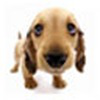

In [27]:
img

In [28]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000000


#### SEGMENTATION

In [44]:
path = Path('/media/karhd/DATA/CAMVID/camvid_tiny')

In [45]:
dls = SegmentationDataLoaders.from_label_func(path,bs=8,fnames=get_image_files(path/'images'),
                                             label_func=lambda o:path/'labels'/f'{o.stem}_P{o.suffix}',
                                             codes = np.loadtxt(path/'codes.txt',dtype=str))

In [51]:
learn = unet_learner(dls,resnet50)

In [52]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.887664,2.679425,00:08


epoch,train_loss,valid_loss,time
0,1.950873,1.646843,00:05
1,1.672063,1.484267,00:04
2,1.564327,1.557309,00:04
3,1.472459,1.202581,00:04
4,1.358599,1.019341,00:04
5,1.240426,0.880762,00:04
6,1.134187,0.870522,00:04
7,1.050444,0.844039,00:04


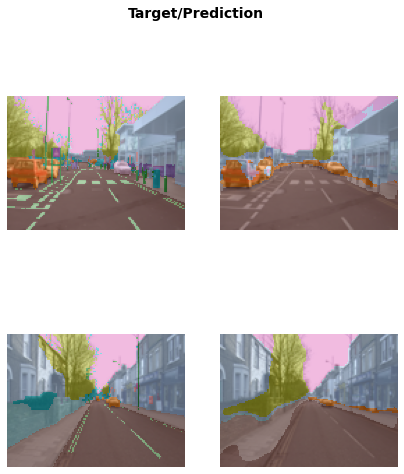

In [54]:
learn.show_results(max_n=6,figsize=(7,8))

#### SENTIMENT ANALYSIS

In [1]:
from fastai.text.all import *

In [2]:
path = Path('/media/karhd/DATA/imdb/')

In [3]:
dls = TextDataLoaders.from_folder(path,valid='test')

In [4]:
learn = text_classifier_learner(dls,AWD_LSTM,drop_mult=0.5,metrics=accuracy)

In [5]:
learn.fine_tune(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.582436,0.394779,0.824280,01:54


epoch,train_loss,valid_loss,accuracy,time
0,0.318575,0.331640,0.859160,03:26
1,0.233905,0.215938,0.917480,03:39
2,0.185005,0.200035,0.924320,03:25
3,0.171234,0.193519,0.928120,03:28


In [12]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0026, 0.9974]))

#### TABULAR DATA ANALYSIS

In [3]:
from fastai.tabular.all import * 

In [15]:
path = Path('/media/karhd/DATA/adult_sample/')

In [16]:
dls = TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names="salary",
                                 cat_names=['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
                                 cont_names = ['age', 'fnlwgt', 'education-num'],
                                 procs = [Categorify, FillMissing, Normalize])

In [17]:
learn = tabular_learner(dls,metrics=accuracy)

In [18]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.364557,0.348984,0.840141,00:04
1,0.366571,0.348505,0.837070,00:04
2,0.334716,0.342239,0.840909,00:04


#### COLLAB FILTERING

In [1]:
from fastai.collab import *

In [4]:
path = Path('/media/karhd/DATA/movielens_dataSet/')

In [8]:
dls = CollabDataLoaders.from_csv(path/'ml-latest-small'/'ratings.csv')

In [9]:
learn = collab_learner(dls,y_range=(0.5,5.5))

In [12]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,0.356464,0.744167,00:08


epoch,train_loss,valid_loss,time
0,0.278411,0.743223,00:07
1,0.257835,0.751661,00:07
2,0.244799,0.768334,00:07
3,0.195666,0.786182,00:07
4,0.165961,0.802548,00:07
5,0.142915,0.815138,00:07
6,0.115447,0.825270,00:08
7,0.100427,0.830656,00:08
8,0.091765,0.832929,00:07
9,0.088967,0.833281,00:08


In [13]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,28.0,640.0,4.5,4.161407
1,514.0,2438.0,4.0,3.470836
2,63.0,6135.0,3.5,3.999069
3,91.0,1032.0,3.5,4.047879
4,232.0,5539.0,2.5,1.964191
5,606.0,955.0,4.5,4.151321
6,520.0,2886.0,3.5,3.623720
7,177.0,5653.0,2.5,4.054760
8,380.0,3351.0,3.0,3.265724
